# Feature Selection Techniques in Machine Learning


Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of feature selection is to improve the performance of a predictive model and reduce the computational cost of modeling.

The main benefits of performing feature selection in advance, rather than letting the machine learning model figure out which features are most important, include:

   1. simpler models: simple models are easy to explain - a model that is too complex and unexplainable is not valuable
   2. shorter training times: a more precise subset of features decreases the amount of time needed to train a model
   3. variance reduction: increase the precision of the estimates that can be obtained for a given simulation 
   4. avoid the curse of high dimensionality: dimensionally cursed phenomena states that, as dimensionality and the number of features increases, the volume of space increases so fast that the available data become limited - PCA feature selection may be used to reduce dimensionality 
    

Feature selection algorithms are categorized as either supervised, which can be used for labeled data; or unsupervised, which can be used for unlabeled data. Unsupervised techniques are classified as filter methods, wrapper methods, embedded methods, or hybrid methods:
   
   - Filter methods: Filter methods select features based on statistics rather than feature selection cross-validation performance. A selected metric is applied to identify irrelevant attributes and perform recursive feature selection. Filter methods are either univariate, in which an ordered ranking list of features is established to inform the final selection of feature subset; or multivariate, which evaluates the relevance of the features as a whole, identifying redundant and irrelevant features.
   - Wrapper methods: Wrapper feature selection methods consider the selection of a set of features as a search problem, whereby their quality is assessed with the preparation, evaluation, and comparison of a combination of features to other combinations of features. This method facilitates the detection of possible interactions amongst variables. Wrapper methods focus on feature subsets that will help improve the quality of the results of the clustering algorithm used for the selection. Popular examples include Boruta feature selection and Forward feature selection
    
   - Embedded methods: Embedded feature selection methods integrate the feature selection machine learning algorithm as part of the learning algorithm, in which classification and feature selection are performed simultaneously. The features that will contribute the most to each iteration of the model training process are carefully extracted. Random forest feature selection, decision tree feature selection, and LASSO feature selection are common embedded methods.
    
## Why Feature Selection is Important

Feature selection is an invaluable asset for data scientists. Understanding how to select important features in machine learning is crucial to the efficacy of the machine learning algorithm. Irrelevant, redundant, and noisy features can pollute an algorithm, negatively impacting learning performance, accuracy, and computational cost. Feature selection is increasingly important as the size and complexity of the average dataset continues to grow exponentially.

    



In [156]:
import numpy as np
import matplotlib.pyplot   as plt
%matplotlib inline

In [157]:
#create some variables 
def createData(N=[500,500]):
    #generar puntos de forma artificial 
    #definir valor medio y desviacion
    mvalues=np.array([[3,3],[5,6]])
    std = [0.8,0.6]
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x= std[ii]*np.random.randn(N[ii],2)+mvalues[ii]
        if ii==0:
            X= x
        else:
            X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y



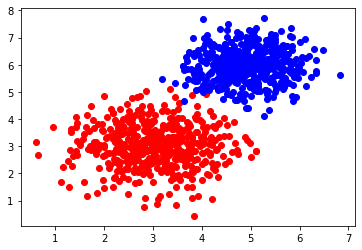

In [158]:
X,Y=createData()
#graficar
labels=np.unique(Y)

color='rbkg'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)
        

In [159]:
X.shape

(1000, 2)

In [160]:
X_non_useful = np.random.randn(X.shape[0],5)
X_new = np.hstack(([X,X_non_useful+5,X_non_useful+X_non_useful*0.1+5]))
X_new.shape

(1000, 12)



## Filter methods

Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

1. Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.


<BarContainer object of 12 artists>

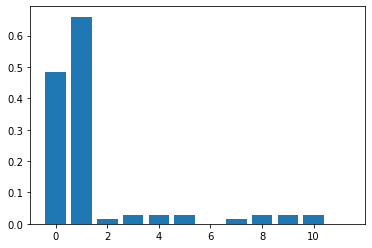

In [161]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
importances = mutual_info_classif(X_new,Y)

plt.bar(np.arange(12),importances)

2.Chi-square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#convertdata to int
X_cat = X_new.astype(int)

chi2_features = SelectKBest(chi2, k=3)
X_best        = chi2_features.fit_transform(X_cat,Y)

print(X_best.shape)

(1000, 3)


3. Fisher’s Score

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [55]:
!pip install skfeature-chappers

<BarContainer object of 12 artists>

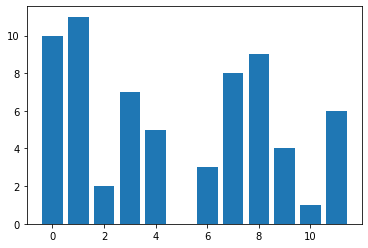

In [57]:
from skfeature.function.similarity_based import fisher_score

importances = fisher_score.fisher_score(X_new,Y)
plt.bar(np.arange(12),importances)

4. Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.


conda install seaborn

<AxesSubplot:>

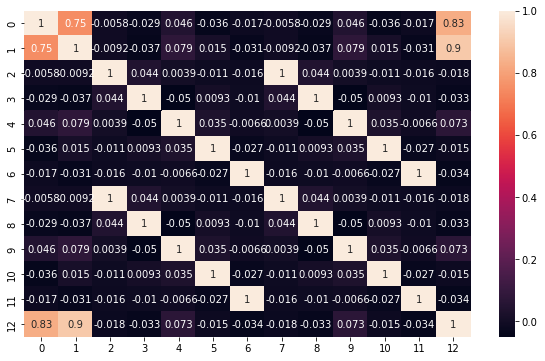

In [71]:
import seaborn as sns
y =  np.array([Y]).T
X_new_class = np.append(X_new,y,axis=1)

cor_mat = np.corrcoef(X_new_class,rowvar=False)

plt.figure(figsize=(10,6))
sns.heatmap(cor_mat, annot=True)

## B. Wrapper Methods:

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

1. Forward Feature Selection

This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.


pip install mlxtend

In [81]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

clf = LogisticRegression(solver='lbfgs',max_iter=500)

ffs= SequentialFeatureSelector(clf,k_features='best',forward=True)

ffs.fit(X_new,Y)

features = list(ffs.k_feature_names_)
features = list(map(int, features))

features

[0, 1, 2, 3, 6]

2. Recursive Feature Elimination

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

clf = LogisticRegression(solver='lbfgs',max_iter=500)


rfe=RFE(clf,n_features_to_select=3)

rfe.fit(X_new,Y)

rfe.ranking_

array([ 1,  1,  7,  5,  9, 10,  2,  4,  3,  6,  8,  1])

## Embedded Methods:

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.


1. LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

clf = LogisticRegression(C=1, penalty='l1',solver='liblinear')
clf.fit(X_new,Y)

model = SelectFromModel(estimator=clf,prefit=True)

X_new_fs = model.transform(X_new)



2. Random Forest Importance

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

<BarContainer object of 12 artists>

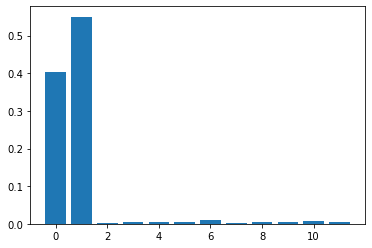

In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_new,Y)

importances = clf.feature_importances_
plt.bar(np.arange(12),importances)

In [119]:
importances 

array([0.4948356 , 0.44904426, 0.00258598, 0.00643156, 0.00912906,
       0.00608225, 0.00537505, 0.00345945, 0.00717474, 0.00634388,
       0.00324954, 0.00628863])

# Dimensionality reduction

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

Principal component analysis (PCA).


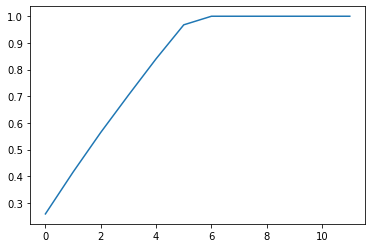

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)


pca.fit(X_new)

plt.plot(pca.explained_variance_ratio_.cumsum())


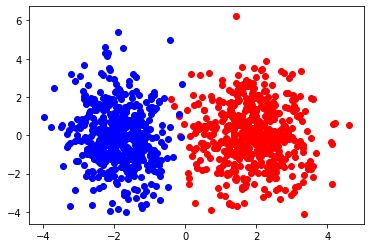

In [133]:
pca = PCA(n_components=2)
pca.fit(X_new)

X_pca = pca.transform(X_new)

color='rbkg'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X_pca[Y==ii,0],X_pca[Y==ii,1],key)
        

# A Case study in Python
The dataset corresponds to classification tasks on which you need to predict if a person has diabetes based on 8 features.

There are a total of 768 observations in the dataset. Your first task is to load the dataset so that you can proceed. But before that let's import the necessary dependencies, you are going to need. You can import the other ones as you go along.

In [134]:
import pandas as pd
import numpy as np
data = pd.read_csv("datosML/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPresure,SkinThickness,insulin,BMI,DiabetesPedFunc,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So you can see 8 different features labeled into the outcomes of 1 and 0 where 1 stands for the observation has diabetes, and 0 denotes the observation does not have diabetes. The dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value

In [148]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#array = dataframe.values
array = data.values
X = array[:,0:8]
Y = array[:,8]


In [149]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


Interpretation:

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): plas, test, mass, and age. This scores will help you further in determining the best features for training your model.

P.S.: The first row denotes the names of the features. For preprocessing of the dataset, the names have been numerically encoded.

Next, you will implement Recursive Feature Elimination which is a type of wrapper feature selection method.

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [150]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/home/sarria/anaconda3/envs/mlbasic/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/sarria/anaconda3/envs/mlbasic/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


You can see that RFE chose the top 3 features as preg, mass, and pedi.

These are marked True in the support array and marked with a choice “1” in the ranking array. This, in turn, indicates the strength of these features.

Next up you will use Ridge regression which is basically a regularization technique and an embedded feature selection techniques as well.

In [152]:
# First things first
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [153]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7


Why do these traditional feature selection methods still hold?

Yes, this question is obvious. Because there are neural net architectures (for example CNNs) which are quite capable of extracting the most significant features from data but that too has a limitation. Using a CNN for a regular tabular dataset which does not have specific properties (the properties that a typical image holds like transitional properties, edges, positional properties, contours etc.) is not the wisest decision to make. Moreover, when you have limited data and limited resources, training a CNN on regular tabular datasets might turn into a complete waste. So, in situations like that, the methods that you studied will definitely come handy